In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import  MLPRegressor
import metrics_jor 
import climb
import pickle
import plot_jordi

# 3. Regression

In [2]:
X_train = pd.read_csv('../data/X_train.csv',index_col=0)
X_test = pd.read_csv('../data/X_test.csv',index_col=0)
y_train = pd.read_csv('../data/y_train.csv',index_col=0)
y_test = pd.read_csv('../data/y_test.csv',index_col=0)

In [3]:
X_train.head()

,sex,height,weight,age,years_cl,AUS,AUT,BEL,BRA,CAN,...,NLD,NOR,POL,PRT,RUS,SVN,SWE,USA,ZAF,other
0,-0.343238,-3.481824,-0.743802,-0.459692,-0.180052,-0.155445,-0.18155,-0.13971,-0.189908,-0.16497,...,-0.150143,-0.186048,-0.295008,-0.125356,-0.154791,-0.134588,4.110077,-0.348844,-0.146741,-0.317303
1,-0.343238,-3.509233,-0.775795,-0.459692,-0.126143,-0.155445,-0.18155,-0.13971,-0.189908,-0.16497,...,-0.150143,-0.186048,-0.295008,-0.125356,-0.154791,-0.134588,-0.243304,2.866613,-0.146741,-0.317303
2,-0.343238,-3.471670,-0.721401,-0.450736,-0.117259,-0.155445,-0.18155,-0.13971,-0.189908,-0.16497,...,-0.150143,-0.186048,-0.295008,-0.125356,-0.154791,-0.134588,-0.243304,-0.348844,-0.146741,-0.317303
3,-0.343238,-3.471670,-0.765360,-0.410255,-0.126143,-0.155445,-0.18155,-0.13971,-0.189908,-0.16497,...,-0.150143,-0.186048,-0.295008,-0.125356,-0.154791,-0.134588,-0.243304,-0.348844,-0.146741,-0.317303
4,-0.343238,-3.478498,-0.754692,-0.450736,-0.136311,-0.155445,-0.18155,-0.13971,-0.189908,-0.16497,...,-0.150143,-0.186048,-0.295008,-0.125356,-0.154791,-0.134588,-0.243304,-0.348844,-0.146741,-0.317303


## a. Linear Regression

<b> Modeling

In [4]:
reg = LinearRegression().fit(X_train, y_train)

<b> Prediction

In [5]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [6]:
metrics_jor.MetricsResults(y_train, y_pred_train,y_test,y_pred_test) # 4 es un error de 1 grado.. 6a-6b

,metrics,Train,Test
0,R2,0.34,0.34
1,MSE,42.85,42.87
2,RMSE,6.55,6.55
3,MAE,5.15,5.17
4,MAPE,9.59,9.69


In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [8]:
mean_absolute_percentage_error(y_test,y_pred_test)

9.694123779198993

## b. KNN regression

<b> Modeling

In [9]:
knn = KNeighborsRegressor(n_neighbors=20).fit(X_train,y_train)

<b> Prediction

In [10]:
y_pred_train = knn.predict(X_train) 
y_pred_test = knn.predict(X_test) 

In [11]:
metrics_jor.MetricsResults(y_train, y_pred_train,y_test,y_pred_test)

,metrics,Train,Test
0,R2,0.33,0.26
1,MSE,43.26,48.12
2,RMSE,6.58,6.94
3,MAE,5.18,5.48
4,MAPE,9.70,10.31


## c. Neural Network

<b> Modeling

In [12]:
mlp = MLPRegressor(max_iter = 1000).fit(X_train,y_train.values.ravel())

<b> Prediction

In [13]:
y_pred_train = mlp.predict(X_train) 
y_pred_test = mlp.predict(X_test) 

In [14]:
metrics_jor.MetricsResults(y_train, y_pred_train,y_test,y_pred_test)

,metrics,Train,Test
0,R2,0.32,0.30
1,MSE,44.01,44.99
2,RMSE,6.63,6.71
3,MAE,5.21,5.30
4,MAPE,13.63,13.70


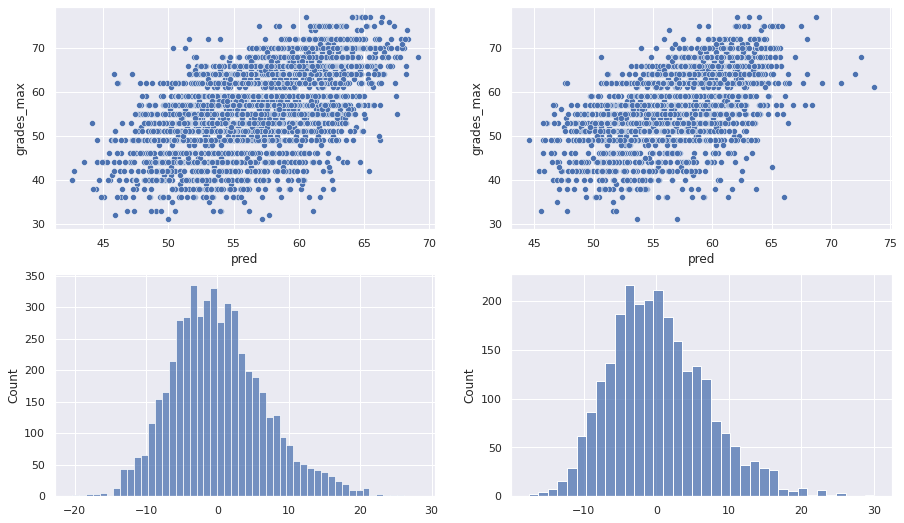

In [15]:
plot_jordi.results_drawer(y_pred_train,y_train,y_pred_test,y_test)

## Conclusion

As we can see the results of the models are not as good as expected. We can certainly say that we need more features in order to be able to build a model more accurate.

## - Save model -

In [16]:
# save the models to disk
filename = '../model/finalized_model.sav'
pickle.dump(reg, open(filename, 'wb'))